In [1]:
import matplotlib.pyplot as plt
import time
from lxml import etree as et
from lxml import html
from urllib.parse import urlparse
from urllib.request import urlopen

NS = dict(md="urn:oasis:names:tc:SAML:2.0:metadata",
          ds='http://www.w3.org/2000/09/xmldsig#',
          mdui="urn:oasis:names:tc:SAML:metadata:ui",
          mdattr="urn:oasis:names:tc:SAML:metadata:attribute",
          mdrpi="urn:oasis:names:tc:SAML:metadata:rpi",
          shibmd="urn:mace:shibboleth:metadata:1.0",
          xrd='http://docs.oasis-open.org/ns/xri/xrd-1.0',
          pyff='http://pyff.io/NS',
          xml='http://www.w3.org/XML/1998/namespace',
          saml="urn:oasis:names:tc:SAML:2.0:assertion",
          xs="http://www.w3.org/2001/XMLSchema",
          xsi="http://www.w3.org/2001/XMLSchema-instance",
          ser="http://eidas.europa.eu/metadata/servicelist",
          eidas="http://eidas.europa.eu/saml-extensions",
          remd="http://refeds.org/metadata",
          icmd="http://id.incommon.org/metadata")

#dictionary containing various Registration Authorities/Fedops
RAs = dict(InCommon="https://incommon.org",
        UKfed="http://ukfederation.org.uk",
        ArnesAAI="http://aai.arnes.si",
        CANARIE="http://www.canarie.ca",
        CARSI="https://www.carsi.edu.cn",
        SURFCONEXT="http://www.surfconext.nl/",
        SWAMID="http://www.swamid.se/")

MDfeed = dict(InCommon="https://mdq.incommon.org/entities",
        UKfed="http://metadata.ukfederation.org.uk/ukfederation-metadata.xml")

# edit fed key as appopriate for your federation/source
fed = "InCommon"
mdsource = MDfeed[fed]

In [2]:
def parseXML(MDOBJ):
    try:
        root = et.parse(urlopen(MDOBJ))
        print("Retrieved MD from ", MDOBJ)
        return(root)
    except:
        print("unable to retrieve MD from ", MDOBJ)

root = parseXML(mdsource)

Retrieved MD from  https://mdq.incommon.org/entities


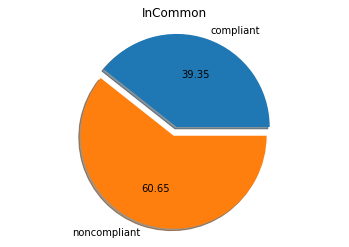

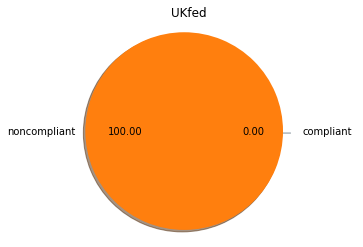

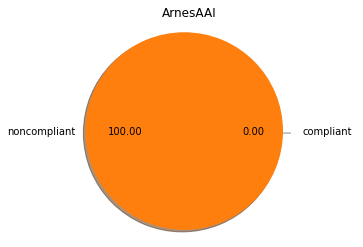

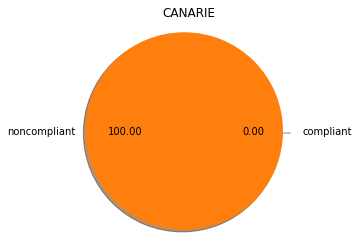

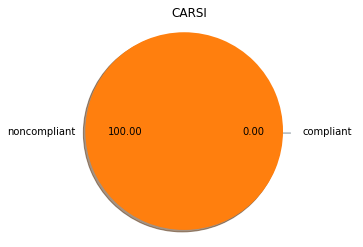

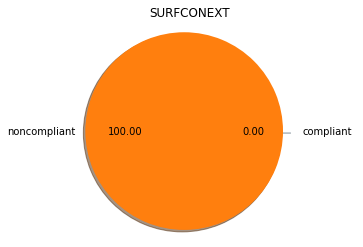

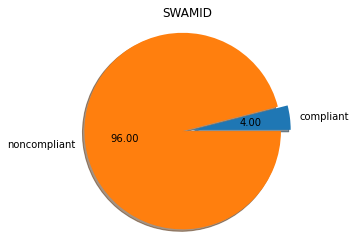

In [15]:
for key in RAs:
    compliant = 0
    noncompliant = 0
    for entity in root.findall(".//{%s}EntityDescriptor" % NS['md']):
        for i in entity.findall(".//{%s}RegistrationInfo" % NS['mdrpi']):
            registrationAuthority = i.get('registrationAuthority')
            if registrationAuthority == RAs[key]:
                if entity.find(".//{%s}IDPSSODescriptor" % NS['md']) is not None: 
                    for e in entity.findall(".//{%s}IDPSSODescriptor" % NS['md']):
                        errorURL = e.get('errorURL')
                        if errorURL is not None:
                            compliant += 1
                        else:
                            noncompliant += 1
    labels = 'compliant', 'noncompliant'
    sizes = [compliant, noncompliant]
    explode = [0.1, 0]
    fig1, ax1 = plt.subplots()
    ax1.pie(sizes, labels=labels, shadow=True, explode=explode, autopct='%.2f')
    plt.title(key)
    ax1.axis('equal')
    plt.show()